In [49]:
%pip install xgboost scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.8 MB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

obesity_df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_features = ['Gender', 'family_history_with_overweight', 'CAEC', 'CALC', 'SCC', 'MTRANS', 'SMOKE', 'NObeyesdad', 'FAVC']
for feature in categorical_features:
    obesity_df[feature] = label_encoder.fit_transform(obesity_df[feature])
    if feature == 'NObeyesdad':
        outcome_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(obesity_df.head())
print(outcome_mapping)

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  
{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4

In [59]:
y=obesity_df['NObeyesdad']
obesity_df.drop(columns=["NObeyesdad"], inplace=True)
print(obesity_df.head())
print(y.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0  3.0     2      0   2.0    0  0.0  1.0     3       3  
1  3.0     2      1   3.0    1  3.0  0.0     2       3  
2  3.0     2      0   2.0    0  2.0  1.0     1       3  
3  3.0     2      0   2.0    0  2.0  0.0     1       4  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  
0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int64


In [60]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the scaler
scaler = MinMaxScaler()

columns = obesity_df.columns

# Apply the scaler to the data (except the target if it's included)
obesity_df = scaler.fit_transform(obesity_df)

# Convert back to DataFrame for visualization
obesity_df = pd.DataFrame(obesity_df, columns=columns)

print(obesity_df.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0     0.0  0.148936  0.320755  0.186567                             1.0   0.0   
1     0.0  0.148936  0.132075  0.126866                             1.0   0.0   
2     1.0  0.191489  0.660377  0.283582                             1.0   0.0   
3     1.0  0.276596  0.660377  0.358209                             0.0   0.0   
4     1.0  0.170213  0.622642  0.379104                             0.0   0.0   

   FCVC       NCP      CAEC  SMOKE  CH2O  SCC       FAF  TUE      CALC  MTRANS  
0   0.5  0.666667  0.666667    0.0   0.5  0.0  0.000000  0.5  1.000000    0.75  
1   1.0  0.666667  0.666667    1.0   1.0  1.0  1.000000  0.0  0.666667    0.75  
2   0.5  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.5  0.333333    0.75  
3   1.0  0.666667  0.666667    0.0   0.5  0.0  0.666667  0.0  0.333333    1.00  
4   0.5  0.000000  0.666667    0.0   0.5  0.0  0.000000  0.0  0.666667    0.75  


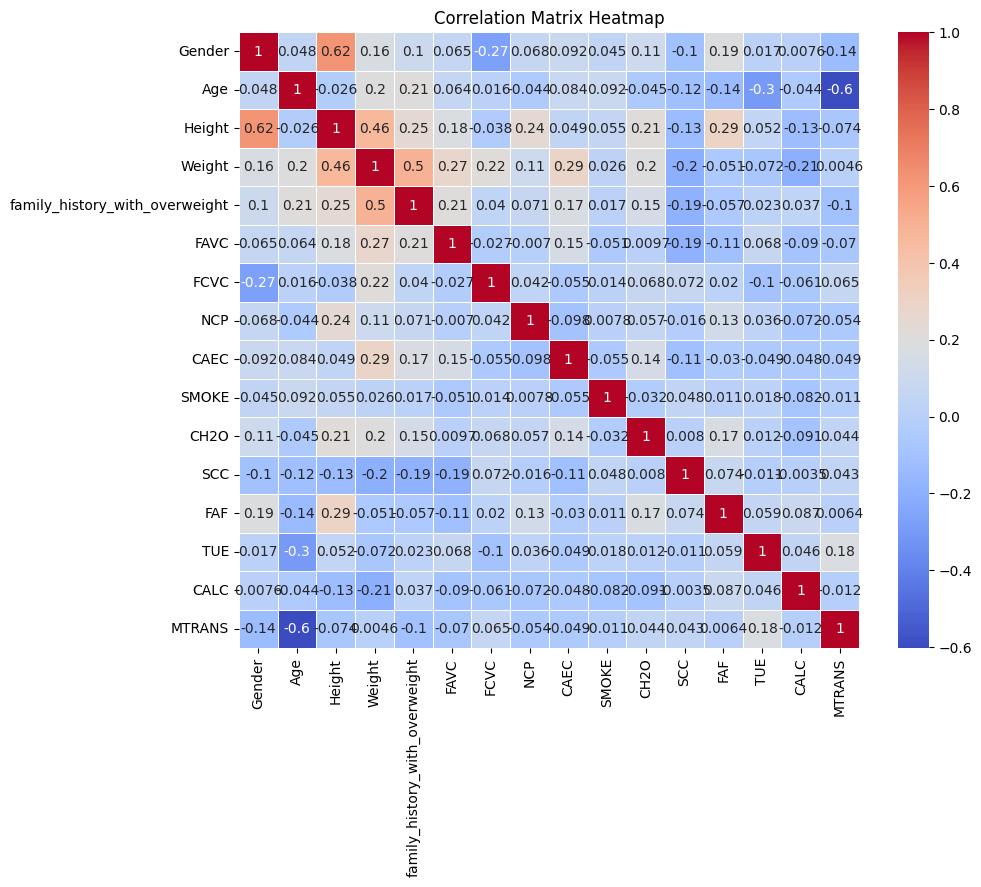

In [61]:
# Calculate the correlation matrix
corr_matrix = obesity_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

/tmp/ipykernel_28/3663289718.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_correlation.index, y=outcome_correlation.values, palette='viridis')


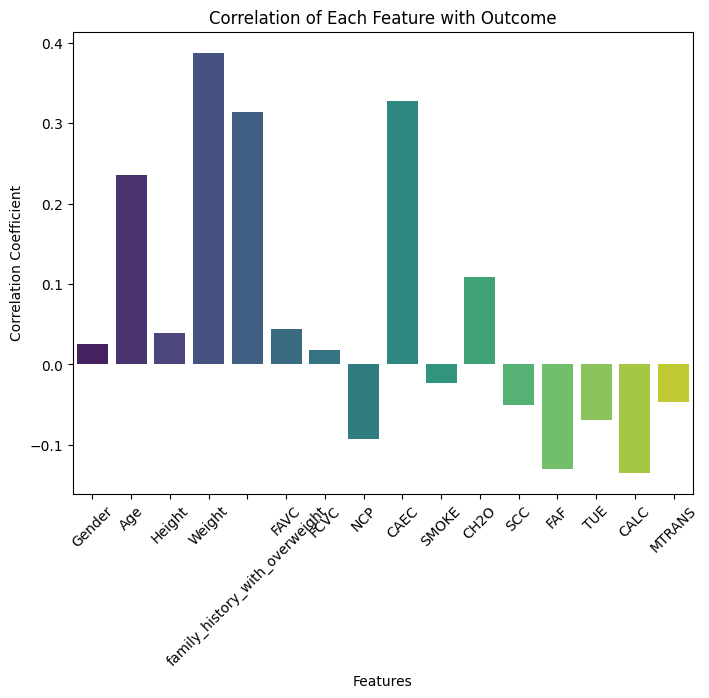

In [62]:
merged_df = pd.merge(obesity_df, y, left_index=True, right_index=True)

# Calculate the correlation matrix
corr_matrix = merged_df.corr()

outcome_correlation = corr_matrix['NObeyesdad'].drop('NObeyesdad')

# Plotting the correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_correlation.index, y=outcome_correlation.values, palette='viridis')
plt.title('Correlation of Each Feature with Outcome')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

X = obesity_df  # Features

# Create a train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (1688, 16)
Testing data shape: (423, 16)


Accuracy: 0.74
F1 Score: 0.73


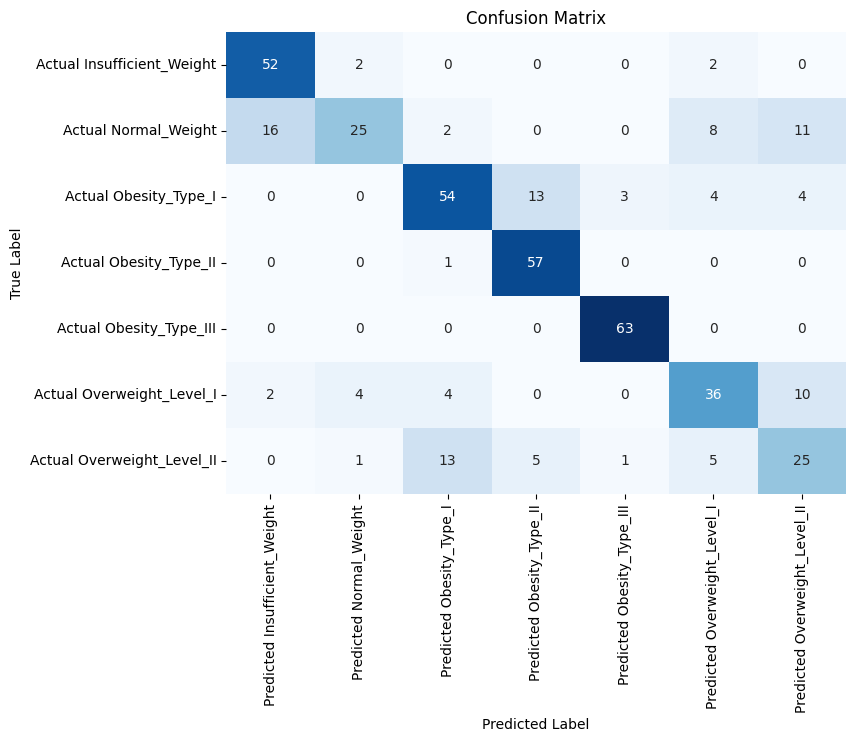

In [64]:
# Logistic Regression Training & Evaluation

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in outcome_mapping.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.75
F1 Score: 0.74


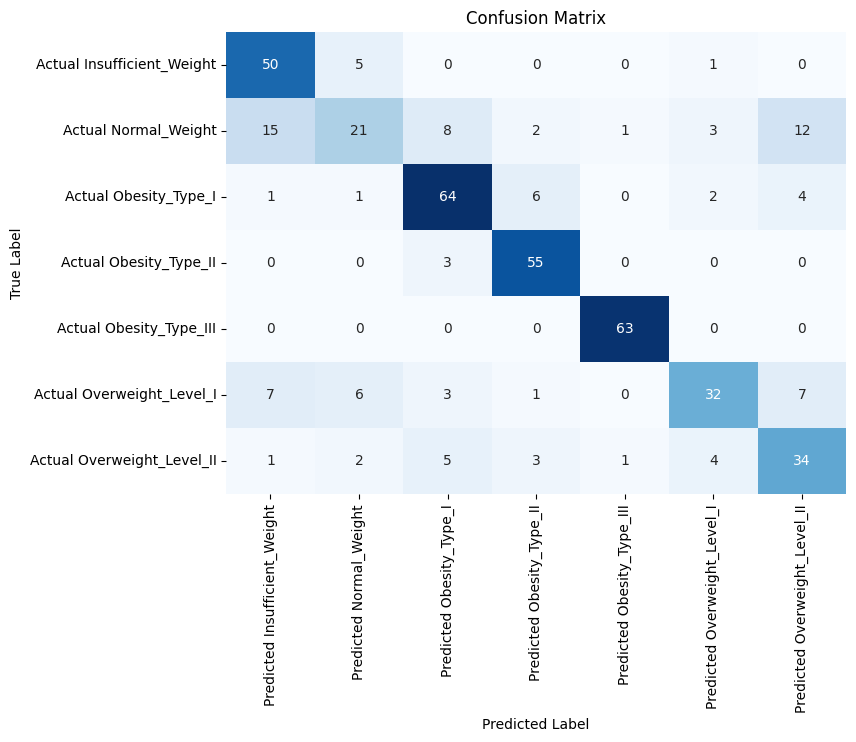

In [66]:
# Knearest Neighbour Training & Evaluation

from sklearn.neighbors import KNeighborsClassifier
# Create a K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.96
F1 Score: 0.96


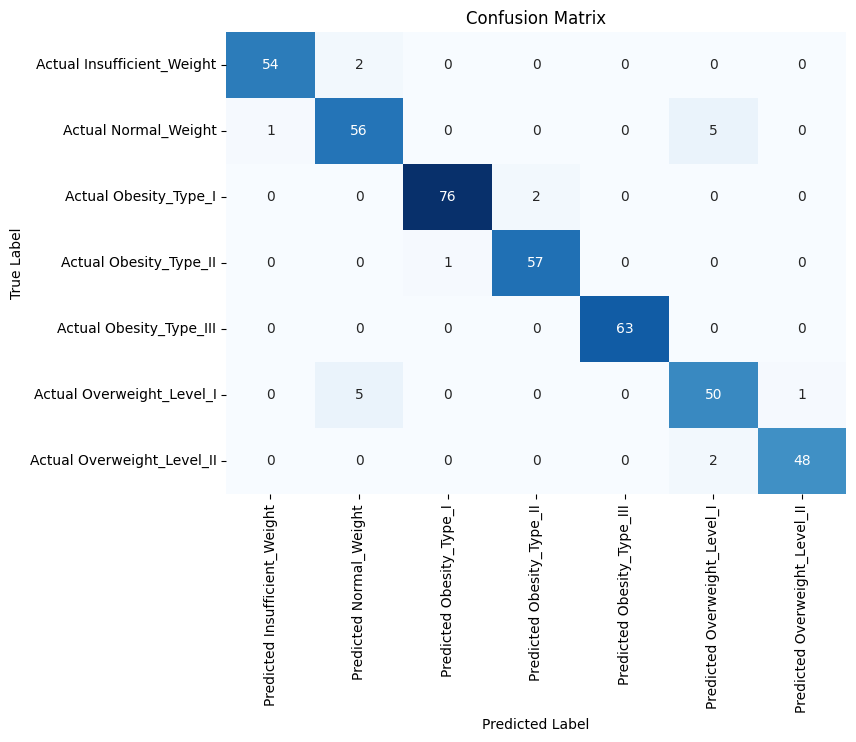

In [67]:
# Random Forest Training & Evaluation

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:55:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.96
F1 Score: 0.96


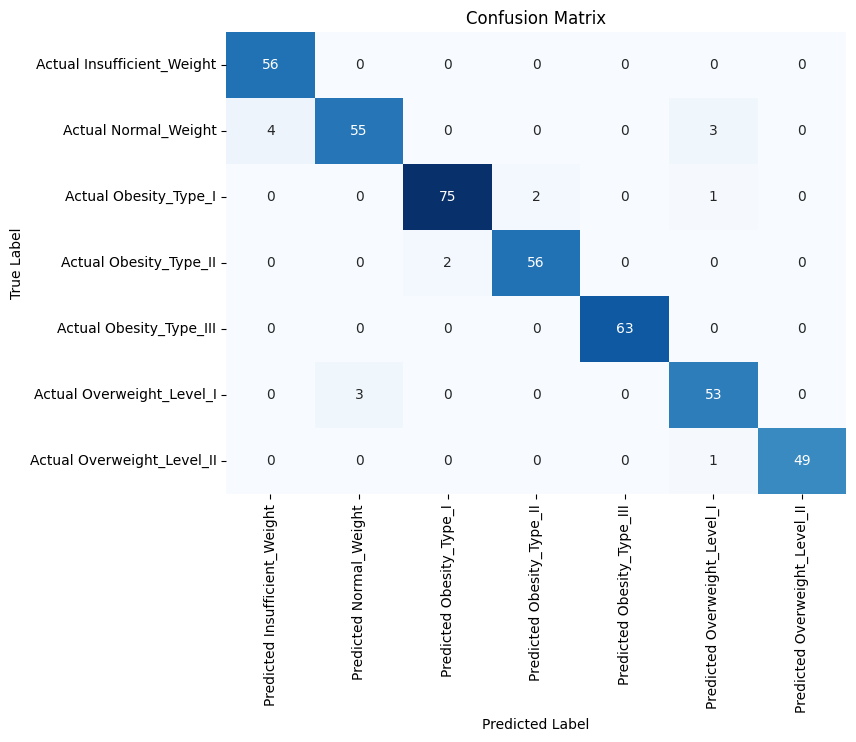

In [68]:
# XGBoost Training & Evaluation
from xgboost import XGBClassifier

# Create an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.83
F1 Score: 0.83


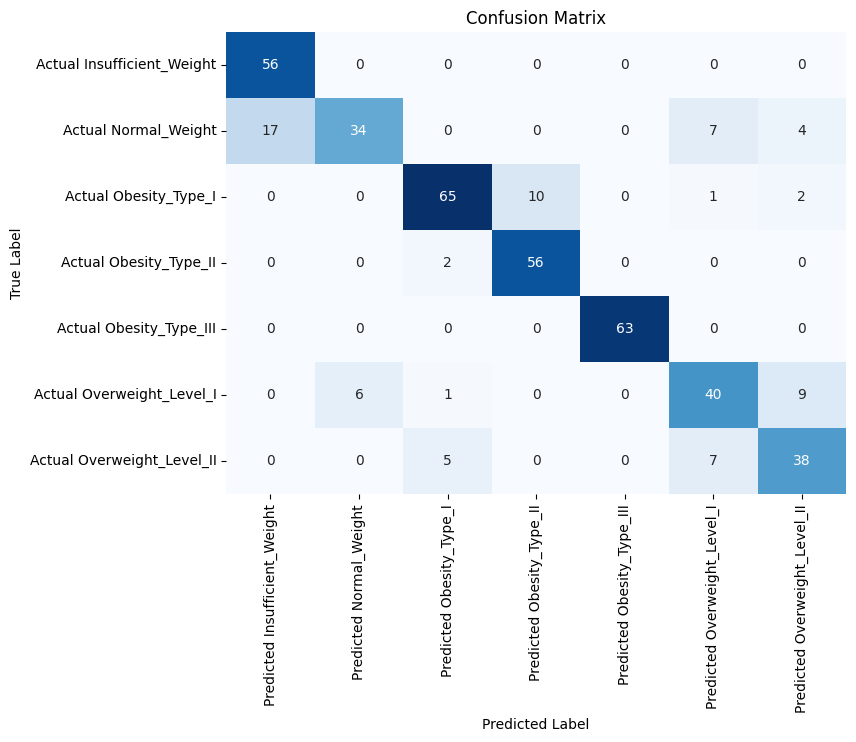

In [70]:
# SVM Training & Evaluation

from sklearn.svm import SVC

# Create a Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.93
F1 Score: 0.93


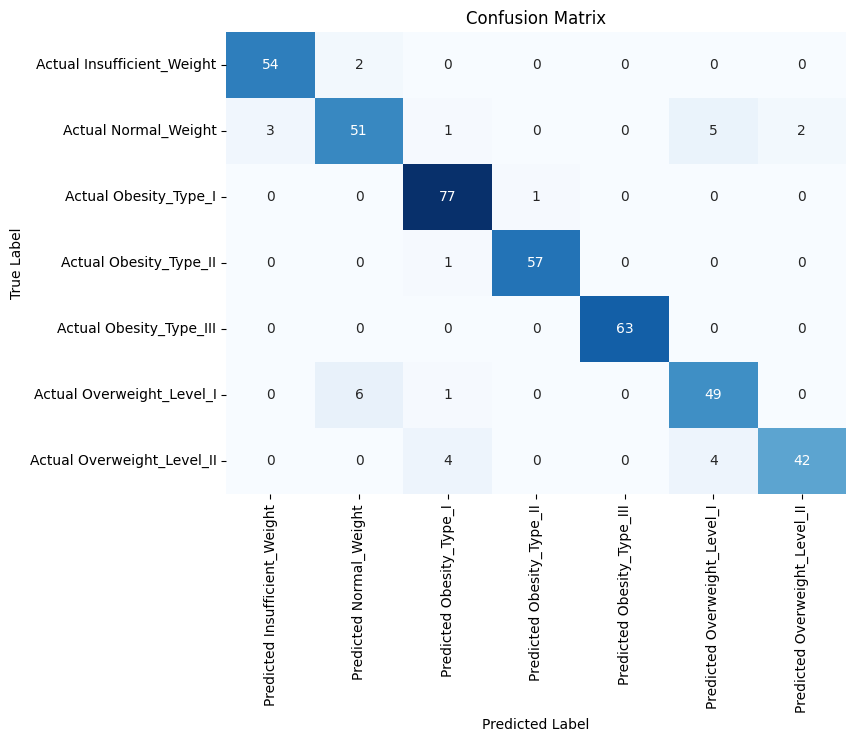

In [80]:
# SVM Training in higher dimensions & Evaluation
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Create a Support Vector Machine model
svm_model = SVC(kernel='poly', degree=5, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)

obese_labels = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}


xticketlabelvalues = []
yticketlabelvalues = []
for obese_label in obese_labels.keys():
    xticketlabelvalues.append("Predicted " + obese_label)
    yticketlabelvalues.append("Actual " + obese_label)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=xticketlabelvalues, 
            yticklabels=yticketlabelvalues)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()